In [1]:
# importing python libraries 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('/home/becomp/4168/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:

gender={'Male':1,'Female':2}
df.Gender=[gender[item] for item in df.Gender]
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


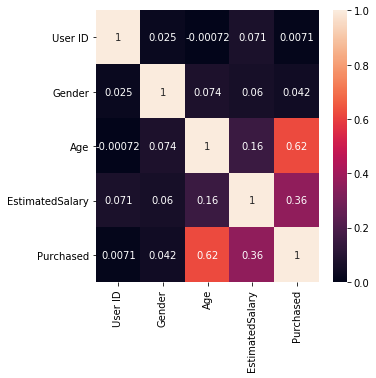

In [4]:
plt.figure(figsize=(5,5))
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [21]:
X=df.iloc[:,2:4]
y=df['Purchased'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [22]:
kmeans=KMeans(n_clusters=2).fit(X_std)
ykmeans=kmeans.predict(X_std)
from sklearn.metrics import confusion_matrix
confusion_matrix(ykmeans, y)

array([[239,  53],
       [ 18,  90]])

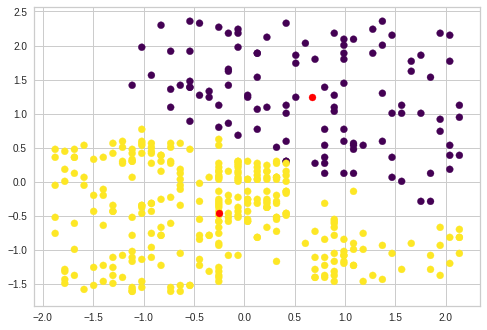

In [20]:
plt.scatter(X_std[:,0], X_std[:,1],c=ykmeans ,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

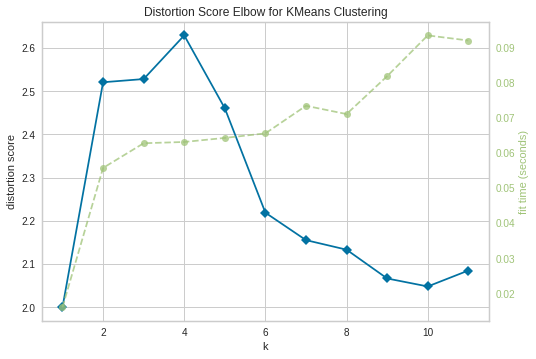

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()   


In [14]:
kmeans=KMeans(n_clusters=6).fit(X_std)
ykmeans=kmeans.predict(X_std)
from sklearn.metrics import confusion_matrix
confusion_matrix(ykmeans, y)

array([[  8,  49,   0,   0,   0,   0],
       [ 69,   1,   0,   0,   0,   0],
       [104,  15,   0,   0,   0,   0],
       [ 63,   0,   0,   0,   0,   0],
       [  5,  42,   0,   0,   0,   0],
       [  8,  36,   0,   0,   0,   0]])

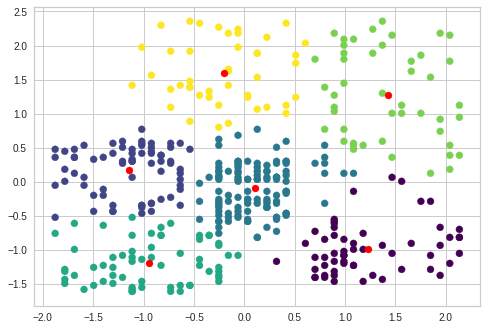

In [15]:
plt.scatter(X_std[:,0], X_std[:,1],c=ykmeans ,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

In [17]:
df.iloc[0:5,:]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int64
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(5)
memory usage: 15.7 KB


In [ ]:
from sklearn.preprocessing import Imputer
values = mydata.values
imputer = Imputer(missing_values=’NaN’, strategy=’mean’)